## 4. Reference Model With Longer Sequence

In [1]:
# import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import array
from pickle import dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

In [2]:
# set random seed for numpy and tensorflow
np.random.seed(1234)
tf.random.set_seed(1234)

### 4.1 Load Sequences

In [3]:
# load doc into memory
def load_doc(filename):
    # open file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load file
in_filename = '../data/Text_Sequences_100_meta.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

### 4.2 Encode Sequences

In [4]:
# interger encode sequences of words

# instantiate Tokenizer
tokenizer = Tokenizer()
# updates internal vocabulary with each unique word in each line in lines
tokenizer.fit_on_texts(lines)  
# transform each text in lines to a sequence of integers
sequences = tokenizer.texts_to_sequences(lines)  

In [5]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print('Vocabulary size is '+ str(vocab_size) + '.')

Vocabulary size is 2534.


### 4.3 Sequence Inputs & Output

#### Assign X and y variables

In [6]:
# separate into input and output

# convert list of lines in sequences to an array
sequences = array(sequences)
# X will contain the first 50 words (elements) in each line (dimension)
X = sequences[:,:-1]
# y will contain the last word (element) in each line (dimension) which will be used to train the predicted word
y = sequences[:,-1]

In [7]:
# seq_length will be the number of words (elements) in each line
seq_length = X.shape[1]
seq_length

100

In [8]:
# check shape of X
X.shape

(21246, 100)

In [9]:
# preview X variable
print(X)

[[ 49 155  54 ... 558  27 194]
 [155  54  16 ...  27 194  12]
 [ 54  16 111 ... 194  12  66]
 ...
 [ 14  26   1 ...  44   3 887]
 [ 26   1 684 ...   3 887  31]
 [  1 684  24 ... 887  31  18]]


X has 21246 dimensions (rows of sequences) and 100 elements (words).

In [10]:
# check shape of y
y.shape

(21246,)

In [11]:
# view output of y
print(y)
print(type(y))

[  12   66  107 ...   31   18 1254]
<class 'numpy.ndarray'>


In [12]:
# converts a class vector (integers) to binary class matrix where number of columns = vocab_size.
y = to_categorical(y, num_classes=vocab_size)

In [13]:
# check shape of y after converting to binary class matrix
y.shape

(21246, 2534)

From the shape of y, the array consists of 21246 rows (sequences) and 2534 features (vocabulary size).

In [14]:
# preview Y variable
print(y)
print(type(y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


### 4.4 Modelling

#### Define & Fit Model

In [15]:
# define the model function
# vocab_size = 2534 and seq_length = 100
def define_model():
    model = Sequential()
    model.add(Embedding(2534, 100, input_length=100))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2534, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
# define model
model = define_model()        

In [17]:
# fit model and assign as history
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
166/166 [==============================] - 48s 270ms/step - loss: 6.3382 - accuracy: 0.0509
Epoch 2/100
166/166 [==============================] - 44s 268ms/step - loss: 5.9524 - accuracy: 0.0537
Epoch 3/100
166/166 [==============================] - 44s 265ms/step - loss: 5.8245 - accuracy: 0.0554
Epoch 4/100
166/166 [==============================] - 45s 271ms/step - loss: 5.6779 - accuracy: 0.0658
Epoch 5/100
166/166 [==============================] - 48s 287ms/step - loss: 5.5715 - accuracy: 0.0733
Epoch 6/100
166/166 [==============================] - 45s 272ms/step - loss: 5.4376 - accuracy: 0.0830
Epoch 7/100
166/166 [==============================] - 44s 263ms/step - loss: 5.3125 - accuracy: 0.0934
Epoch 8/100
166/166 [==============================] - 43s 257ms/step - loss: 5.2157 - accuracy: 0.1031
Epoch 9/100
166/166 [==============================] - 43s 257ms/step - loss: 5.1271 - accuracy: 0.1091
Epoch 10/100
166/166 [==============================] - 43s 257m

166/166 [==============================] - 43s 260ms/step - loss: 1.0761 - accuracy: 0.7304
Epoch 80/100
166/166 [==============================] - 43s 259ms/step - loss: 1.0374 - accuracy: 0.7434
Epoch 81/100
166/166 [==============================] - 43s 259ms/step - loss: 0.9922 - accuracy: 0.7532
Epoch 82/100
166/166 [==============================] - 43s 258ms/step - loss: 0.9411 - accuracy: 0.7697
Epoch 83/100
166/166 [==============================] - 43s 259ms/step - loss: 0.9064 - accuracy: 0.7786
Epoch 84/100
166/166 [==============================] - 43s 259ms/step - loss: 0.8689 - accuracy: 0.7866
Epoch 85/100
166/166 [==============================] - 43s 258ms/step - loss: 0.8277 - accuracy: 0.7993
Epoch 86/100
166/166 [==============================] - 43s 260ms/step - loss: 0.7911 - accuracy: 0.8099
Epoch 87/100
166/166 [==============================] - 44s 264ms/step - loss: 0.7558 - accuracy: 0.8195
Epoch 88/100
166/166 [==============================] - 43s 260ms/st

#### Plot Accuracy & Loss Curve

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


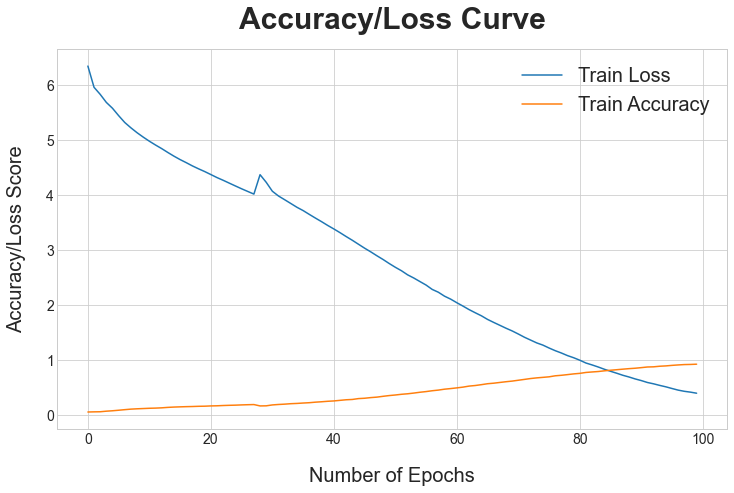

In [24]:
# plot train accuracy and loss curves

# figure size and plot style
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-whitegrid') 

# plot loss and accuracy curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(fontsize=20);

# plot title
plt.title('Accuracy/Loss Curve', fontsize=30, pad=20, weight='bold')
# x-axis label
plt.xlabel('Number of Epochs', fontsize=20, labelpad=20)
# y-axis label
plt.ylabel('Accuracy/Loss Score', fontsize=20, labelpad=20)
# x-ticks
plt.xticks(fontsize=14)
# y-ticks
plt.yticks(fontsize=14)

plt.savefig('../data/Acc_Loss_Curve_Ref_Model_LS.png')

Similar to the reference model, we observe that there is a gradual decrease in loss score and gradual increase in accuracy as the number of epochs increases. In comparing sequence lengths, the longer sequence length (100 words) displayed a loss score of 0.3924 and accuracy of 0.9198 while the reference model with a sequence length of 50 words displayed a loss of 2.4078 and accuracy of 0.4073.

#### Model Summary

In [20]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          253400    
_________________________________________________________________
lstm (LSTM)                  (None, 100, 100)          80400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 2534)              255934    
Total params: 680,234
Trainable params: 680,234
Non-trainable params: 0
_________________________________________________________________


#### Save Model

In [22]:
# save model to file
model.save('model_ref_ls.h5')